# Análisis de Ofertas - Actos Públicos Digitales

Dataset de ofertas laborales docentes de la Provincia de Buenos Aires

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


## 1. Cargar los datos

In [3]:
# Cargar JSON
with open('ofertas_artistica.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Crear DataFrame
df = pd.DataFrame(data['ofertas'])
metadata = data['metadata']

print(f"Total de ofertas: {len(df):,}")
print(f"Fecha de extracción: {metadata['fecha_extraccion']}")
print(f"\nDimensiones del DataFrame: {df.shape}")

Total de ofertas: 21
Fecha de extracción: 2025-12-04T09:56:21.637275

Dimensiones del DataFrame: (21, 46)


## 2. Exploración inicial

In [4]:
# Ver primeras filas
columnas_principales = ['estado', 'cargo', 'descdistrito', 'escuela', 'descnivelmodalidad', 'hsmodulos', 'turno']
df[columnas_principales].head(10)

,estado,cargo,descdistrito,escuela,descnivelmodalidad,hsmodulos,turno
0,Publicada,CONSTRUCCION DE CIUDADANIA (CCD),GENERAL PAZ,0041MS0005,SECUNDARIA,2,T
1,Publicada,CONSTRUCCION DE CIUDADANIA (CCD),ROJAS,0089MT0001,TECNICO PROFESIONAL,2,M
2,Publicada,CONSTRUCCION DE CIUDADANIA (CCD),ROJAS,0089MT0001,TECNICO PROFESIONAL,2,M
3,Publicada,CONSTRUCCION DE CIUDADANIA (CCD),ROJAS,0089MT0001,TECNICO PROFESIONAL,2,M
4,Publicada,CONSTRUCCION DE CIUDADANIA (CCD),ROJAS,0089MT0001,TECNICO PROFESIONAL,2,T
5,Publicada,CONSTRUCCION DE CIUDADANIA (CCD),TIGRE,0055MS3121,SECUNDARIA,2,T
6,Publicada,CONSTRUCCION DE CIUDADANIA (CCD),TIGRE,0055MS3121,SECUNDARIA,2,M
7,Publicada,CONSTRUCCION DE CIUDADANIA (CCD),CAPITAN SARMIENTO,0121MS0002,SECUNDARIA,2,M
8,Publicada,CONSTRUCCION DE CIUDADANIA (CCD),ESCOBAR,0116MT0002,TECNICO PROFESIONAL,2,T
9,Publicada,CONSTRUCCION DE CIUDADANIA (CCD),EZEIZA,0130MS0011,SECUNDARIA,2,T


In [5]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   estado                 21 non-null     object 
 1   tipooferta             21 non-null     object 
 2   jornada                21 non-null     object 
 3   ige                    21 non-null     int64  
 4   miercoles              21 non-null     object 
 5   martes                 21 non-null     object 
 6   acargodireccion        21 non-null     object 
 7   cuilautor              21 non-null     object 
 8   supl_hasta             21 non-null     object 
 9   turno                  21 non-null     object 
 10  idoferta               21 non-null     int64  
 11  sabado                 21 non-null     object 
 12  id                     21 non-null     object 
 13  iddetalle              21 non-null     int64  
 14  cargo                  21 non-null     object 
 15  tomapose

In [6]:
df[df['cargo'].str.contains('danza', case=False, na=False)]

,estado,tipooferta,jornada,ige,miercoles,martes,acargodireccion,cuilautor,supl_hasta,turno,idoferta,sabado,id,iddetalle,cargo,tomaposesion,supl_revista,domiciliodesempeno,reemp_apeynom,numdistrito,areaincumbencia,finoferta,observaciones,cupof,tipooferta_id,supl_desde,reemp_cuil,escuela,iniciooferta,hsmodulos,cursodivision,idsuna,descnivelmodalidad,lunes,infectocontagiosa,reemp_motivo,descdistrito,jueves,nivelmodalidad,viernes,descripcionarea,descripcioncargo,ult_movimiento,_version_,timestamp,postulacion_idganador
12,Publicada,DESIGNACIONES DOCENTES,JS,3772596,,14 a 16,No,27286966301,2025-12-21T00:00:00Z,T,3774039,,3758839,3758839,Maestro de Danza Primaria (MDP),2025-12-02T00:00:00Z,S,LIBERTADOR,costal eugenia,96,MDP,2025-12-09T07:30:00Z,,0,3,2025-12-01T00:00:00Z,27402596908,0096PP0003,2025-12-02T09:45:33.993Z,2,5to c,NaN,ARTISTICA,,False,Licencia medica(ART114medica),SAN ISIDRO,,T,,Maestro de Danza Primaria (MDP),Maestro de Danza Primaria (MDP),2025-12-02T09:45:47.093Z,1850581975463624710,2025-12-04T12:48:20.404Z,NaN
13,Publicada,DESIGNACIONES DOCENTES,JS,3777444,,15.00 - 17.00,No,27302297938,2030-03-01T00:00:00Z,T,3777444,,3762244,3762244,Maestro de Danza Primaria (MDP),2025-12-09T00:00:00Z,S,MAYOR BURATOVICH - SAN MARTIN Y DR. FAVALORO ...,BERAMENDI MAYRA ALEJANDRA,110,MDP,2025-12-05T10:30:00Z,,1629165,3,2025-11-15T00:00:00Z,27374363129,0110PP0053,2025-12-04T09:03:43.527Z,2,2°B,55008263.0,ARTISTICA,,False,Licencia no medica por ARTICULO 115(ART115),VILLARINO,,T,,Maestro de Danza Primaria (MDP),Maestro de Danza Primaria (MDP),2025-12-04T09:06:59.647Z,1850581976976719876,2025-12-04T12:48:21.847Z,NaN
14,Publicada,DESIGNACIONES DOCENTES,JS,3770342,,13 a 15 hs,No,27250827313,9999-12-30T19:15:36.037Z,T,3777545,,3762345,3762345,Maestro de Danza Primaria (MDP),2025-11-30T21:00:00Z,P,H. YRIGOYEN E/ L.N. ALEM Y BANCALARI,,116,MDP,2025-12-05T07:30:00Z,,4444,3,9999-12-30T19:15:36.037Z,,0116PP0006,2025-12-04T09:40:38.657Z,2,4B,NaN,ARTISTICA,,False,,ESCOBAR,,T,,Maestro de Danza Primaria (MDP),Maestro de Danza Primaria (MDP),2025-12-04T09:40:46.983Z,1850581838213414915,2025-12-04T12:46:09.512Z,0.0
15,Publicada,DESIGNACIONES DOCENTES,JS,3768043,,,No,20229700953,2025-12-31T00:00:00Z,T,3777317,,3762117,3762117,Maestro de Danza Primaria (MDP),2025-11-28T00:00:00Z,S,DR. BIRMAN,FERNANDEZ GUILLERMO MATIAS,44,MDP,2025-12-05T07:30:00Z,,1659238,3,2025-11-27T00:00:00Z,20280073246,0044PP0022,2025-12-04T08:40:44.127Z,2,5°A,0.0,ARTISTICA,15 A 17 HS,False,Licencia no medica por ARTICULO 114(ART114NOme...,GENERAL RODRIGUEZ,,T,,Maestro de Danza Primaria (MDP),Maestro de Danza Primaria (MDP),2025-12-04T08:40:48.747Z,1850581977396150276,2025-12-04T12:48:22.247Z,NaN
16,Publicada,DESIGNACIONES DOCENTES,JS,3777097,,,No,27293667530,9999-12-30T10:57:55.827Z,M,3777097,,3761897,3761897,Maestro de Danza Primaria (MDP),2025-12-05T00:00:00Z,P,PRESIDENTE YRIGOYEN-30 DE AGOSTO ...,,106,MDP,2025-12-05T07:30:00Z,,0,3,9999-12-30T10:57:55.827Z,,0106PP0004,2025-12-04T07:56:43.073Z,2,4° 1,0.0,ARTISTICA,,False,,TRENQUE LAUQUEN,,T,8:00 A 10:00,Maestro de Danza Primaria (MDP),Maestro de Danza Primaria (MDP),2025-12-04T07:57:55.490Z,1850581977397198850,2025-12-04T12:48:22.248Z,NaN
17,Publicada,DESIGNACIONES DOCENTES,JS,3776241,14:00 a 15:00,,No,27250827313,9999-12-30T13:54:21.003Z,T,3777544,,3762344,3762344,Maestro de Danza Primaria (MDP),2025-12-03T21:00:00Z,P,BUEN AIRE E/25 DE AGOSTO Y 18 DE JULIO,,116,MDP,2025-12-05T07:30:00Z,PROVISIONALIDAD.,4444,3,9999-12-30T13:54:21.003Z,,0116PP0030,2025-12-04T09:39:55.273Z,2,3° C,NaN,ARTISTICA,,False,,ESCOBAR,,T,14:00 a 15:00,Maestro de Danza Primaria (MDP),Maestro de Danza Primaria (MDP),2025-12-04T09:40:06.107Z,1850581977406636034,2025-12-04T12:48:22.257Z,NaN
20,Publicada,DESIGNACIONES DOCENTES,JS,3777522,,,No,27265974223,2025-12-17T00:00:00Z,M,3777522,,3762322,3762322,PANORAMA DE LA PRODUCCION CONTEMPORANEA EN DAN...,2025-12-05T00:00:00Z,S,DIAGONAL J. B. ALBERDI 2428,CARRIQUIRY JULIETA,43,YCD,2025-12-05T07:30:00Z,,1702998,3,2025-11-26T

In [7]:
# Estadísticas descriptivas para columnas numéricas
df.describe()

,ige,idoferta,iddetalle,numdistrito,cupof,tipooferta_id,hsmodulos,idsuna,_version_,postulacion_idganador
count,2.100000e+01,2.100000e+01,2.100000e+01,21.000000,2.100000e+01,21.0,21.000000,9.000000e+00,2.100000e+01,1.0
mean,3.773674e+06,3.776197e+06,3.760997e+06,80.666667,8.334602e+05,3.0,1.952381,1.854067e+07,1.850582e+18,0.0
std,5.176308e+03,1.777479e+03,1.777344e+03,33.126022,9.120084e+05,0.0,0.497613,2.731407e+07,3.029112e+10,NaN
min,3.759897e+06,3.771392e+06,3.756193e+06,18.000000,0.000000e+00,3.0,0.000000,0.000000e+00,1.850582e+18,0.0
25%,3.772596e+06,3.774092e+06,3.758892e+06,55.000000,0.000000e+00,3.0,2.000000,0.000000e+00,1.850582e+18,0.0
50%,3.776241e+06,3.777097e+06,3.761897e+06,89.000000,2.735700e+05,3.0,2.000000,9.999990e+05,1.850582e+18,0.0
75%,3.777097e+06,3.777444e+06,3.762244e+06,110.000000,1.629165e+06,3.0,2.000000,5.489391e+07,1.850582e+18,0.0
max,3.777554e+06,3.777554e+06,3.762354e+06,130.000000,2.677997e+06,3.0,3.000000,5.500826e+07,1.850582e+18,0.0


## 3. Análisis por Estado

In [8]:
# Distribución por estado
estado_counts = df['estado'].value_counts()
print(estado_counts)
print("\nPorcentajes:")
print(df['estado'].value_counts(normalize=True) * 100)

estado
Publicada    21
Name: count, dtype: int64

Porcentajes:
estado
Publicada    100.0
Name: proportion, dtype: float64


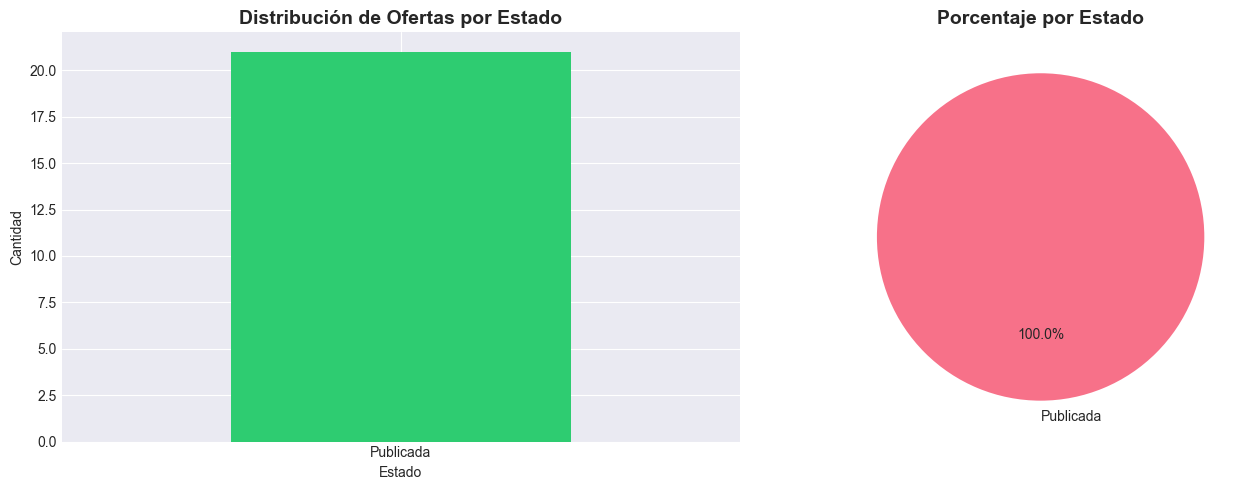

In [9]:
# Gráfico de distribución por estado
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
df['estado'].value_counts().plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c'])
ax[0].set_title('Distribución de Ofertas por Estado', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Estado')
ax[0].set_ylabel('Cantidad')
ax[0].tick_params(axis='x', rotation=0)

# Gráfico de torta
df['estado'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', startangle=90)
ax[1].set_title('Porcentaje por Estado', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 4. Análisis por Distrito

descdistrito
ROJAS                 4
ESCOBAR               3
TIGRE                 2
LA MATANZA            2
CAPITAN SARMIENTO     1
GENERAL PAZ           1
EZEIZA                1
SAN ISIDRO            1
VILLARINO             1
GENERAL RODRIGUEZ     1
TRENQUE LAUQUEN       1
CARLOS TEJEDOR        1
GENERAL ALVARADO      1
GENERAL PUEYRREDON    1
Name: count, dtype: int64


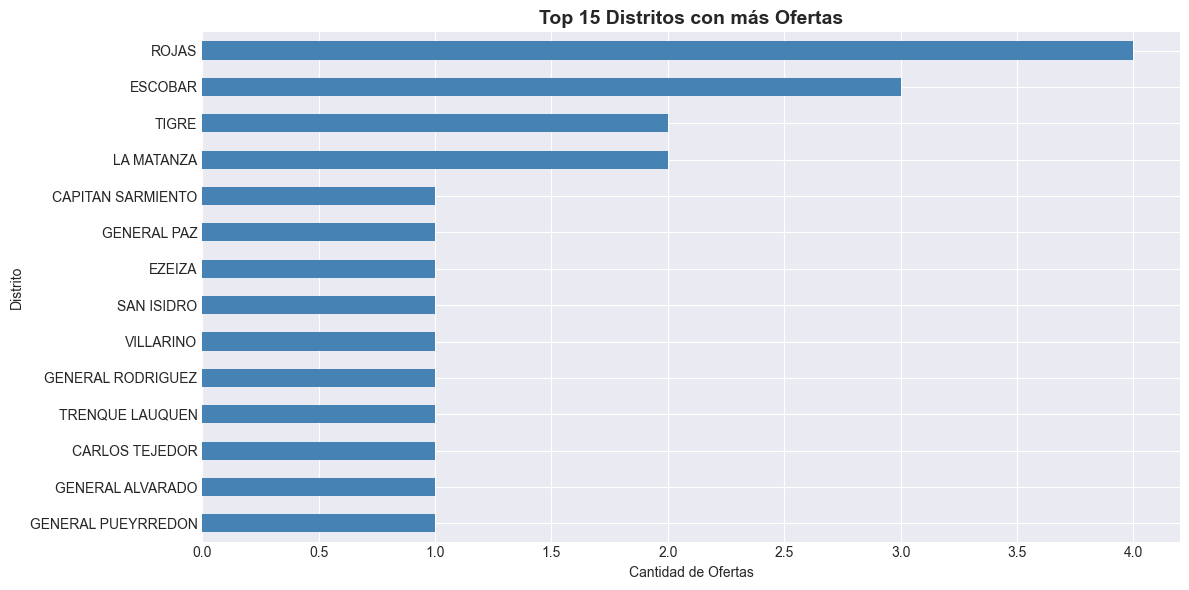

In [10]:
# Top 15 distritos con más ofertas
top_distritos = df['descdistrito'].value_counts().head(15)
print(top_distritos)

# Gráfico
plt.figure(figsize=(12, 6))
top_distritos.plot(kind='barh', color='steelblue')
plt.title('Top 15 Distritos con más Ofertas', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Ofertas')
plt.ylabel('Distrito')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5. Análisis por Cargo

cargo
CONSTRUCCION DE CIUDADANIA (CCD)                           12
Maestro de Danza Primaria (MDP)                             6
MAESTRO EXPRESION CORPORAL ESCUELAS EDUC.ESTETICA (MEC)     1
MAESTRO DE EXPRESIÓN CORPORAL INICIAL (MEI)                 1
PANORAMA DE LA PRODUCCION CONTEMPORANEA EN DANZA (YCD)      1
Name: count, dtype: int64


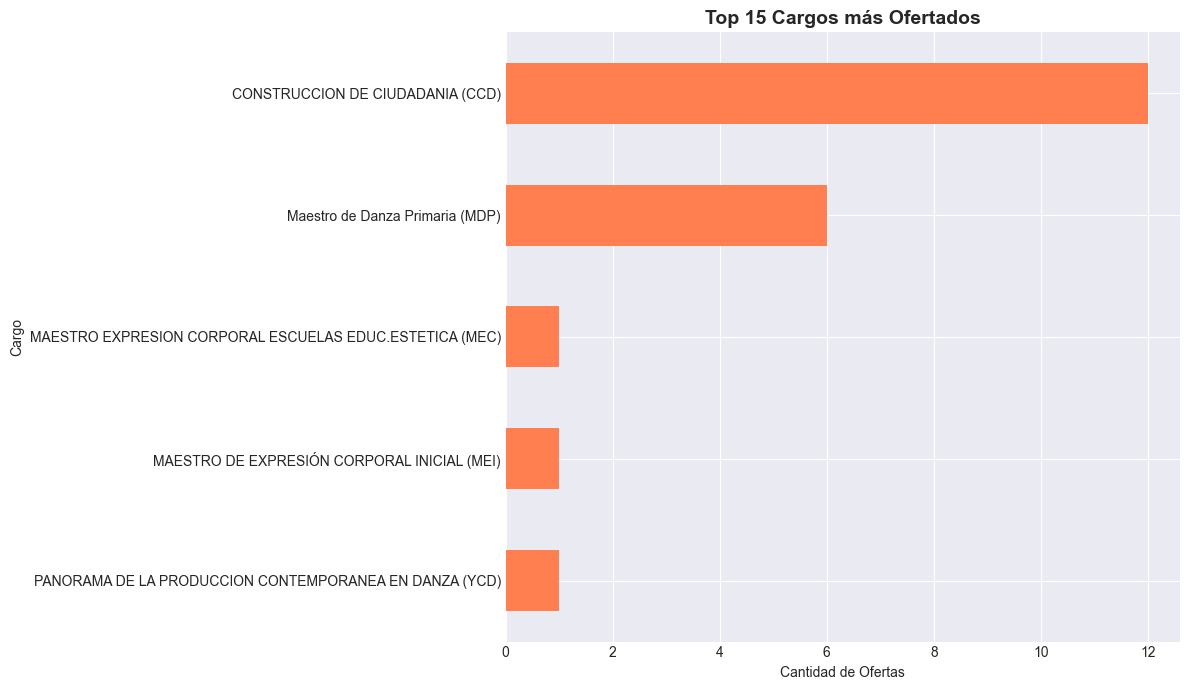

In [11]:
# Top 15 cargos más ofertados
top_cargos = df['cargo'].value_counts().head(15)
print(top_cargos)

# Gráfico
plt.figure(figsize=(12, 7))
top_cargos.plot(kind='barh', color='coral')
plt.title('Top 15 Cargos más Ofertados', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Ofertas')
plt.ylabel('Cargo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 6. Análisis por Nivel/Modalidad

descnivelmodalidad
ARTISTICA              9
SECUNDARIA             7
TECNICO PROFESIONAL    5
Name: count, dtype: int64


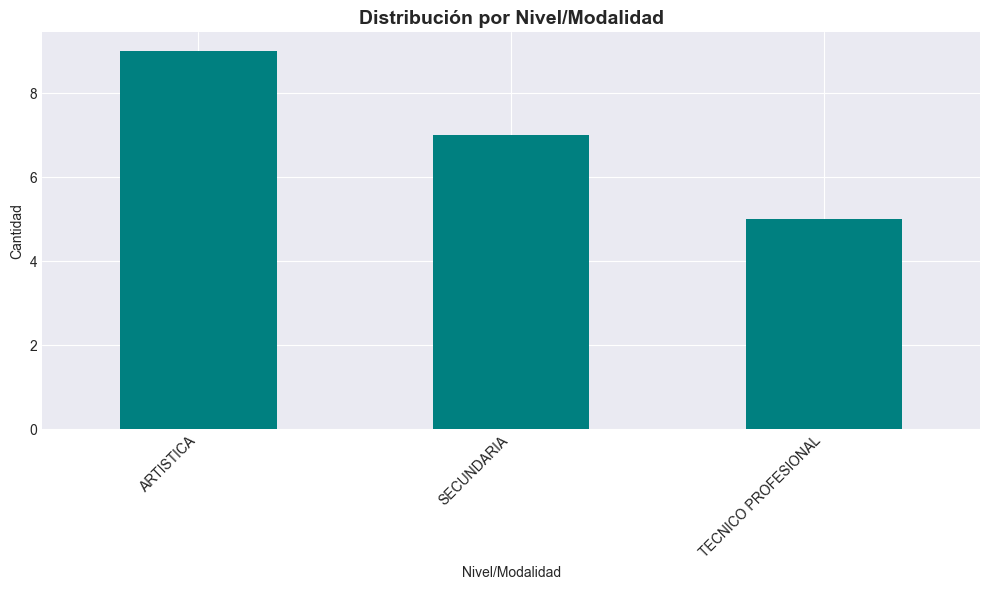

In [12]:
# Distribución por nivel
nivel_counts = df['descnivelmodalidad'].value_counts()
print(nivel_counts)

# Gráfico
plt.figure(figsize=(10, 6))
nivel_counts.plot(kind='bar', color='teal')
plt.title('Distribución por Nivel/Modalidad', fontsize=14, fontweight='bold')
plt.xlabel('Nivel/Modalidad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Análisis de Horas/Módulos

In [13]:
# Estadísticas de horas/módulos
print("Estadísticas de Horas/Módulos:")
print(df['hsmodulos'].describe())
print("\nDistribución de valores:")
print(df['hsmodulos'].value_counts().head(10))

Estadísticas de Horas/Módulos:
count    21.000000
mean      1.952381
std       0.497613
min       0.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: hsmodulos, dtype: float64

Distribución de valores:
hsmodulos
2    19
0     1
3     1
Name: count, dtype: int64


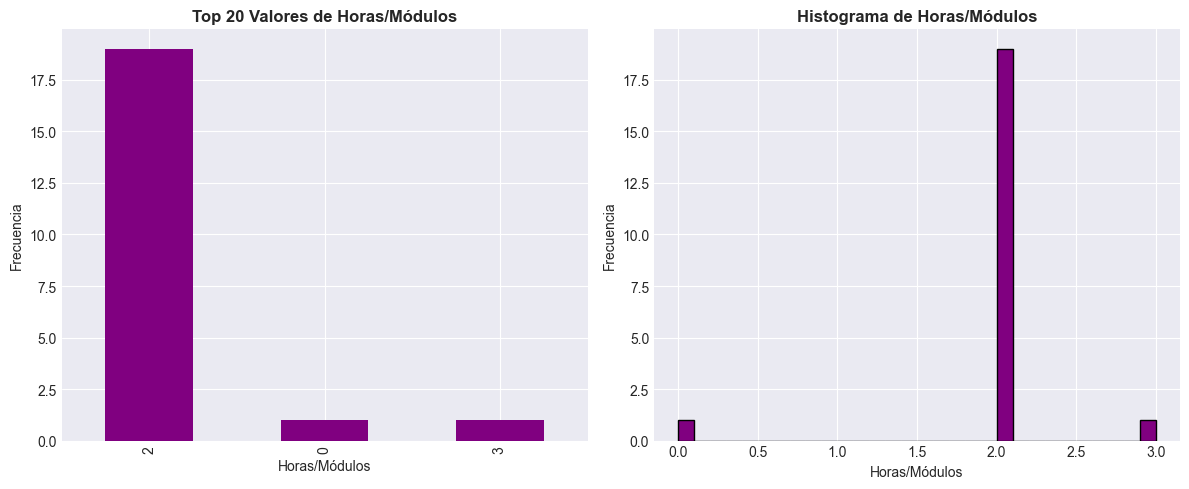

In [14]:
# Gráfico de distribución de horas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['hsmodulos'].value_counts().head(20).plot(kind='bar', color='purple')
plt.title('Top 20 Valores de Horas/Módulos', fontsize=12, fontweight='bold')
plt.xlabel('Horas/Módulos')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df['hsmodulos'].hist(bins=30, color='purple', edgecolor='black')
plt.title('Histograma de Horas/Módulos', fontsize=12, fontweight='bold')
plt.xlabel('Horas/Módulos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 8. Análisis por Turno

turno
T     11
M      9
MT     1
Name: count, dtype: int64


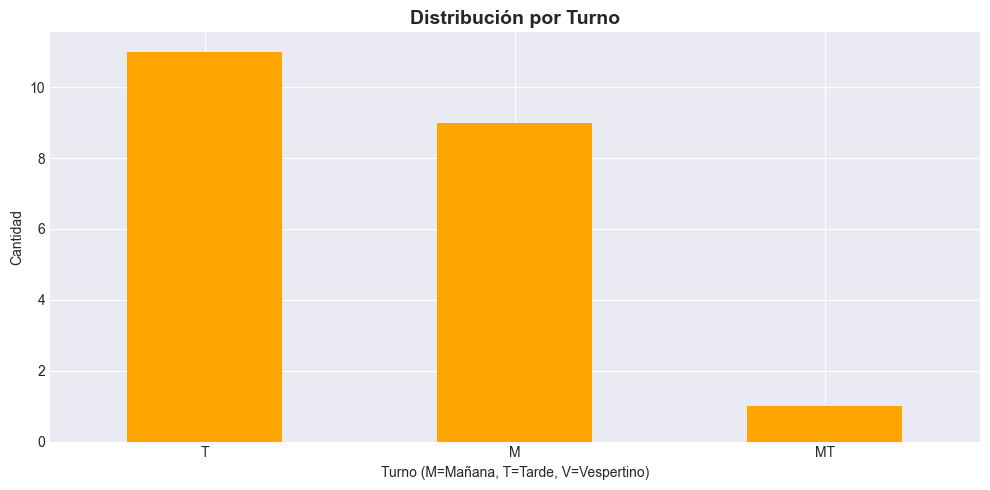

In [15]:
# Distribución por turno
turno_counts = df['turno'].value_counts()
print(turno_counts)

# Gráfico
plt.figure(figsize=(10, 5))
turno_counts.plot(kind='bar', color='orange')
plt.title('Distribución por Turno', fontsize=14, fontweight='bold')
plt.xlabel('Turno (M=Mañana, T=Tarde, V=Vespertino)')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 9. Análisis Cruzado: Distrito x Estado

estado             Publicada  All
descdistrito                     
CAPITAN SARMIENTO          1    1
ESCOBAR                    3    3
EZEIZA                     1    1
GENERAL PAZ                1    1
GENERAL RODRIGUEZ          1    1
LA MATANZA                 2    2
ROJAS                      4    4
SAN ISIDRO                 1    1
TIGRE                      2    2
VILLARINO                  1    1
All                       17   17


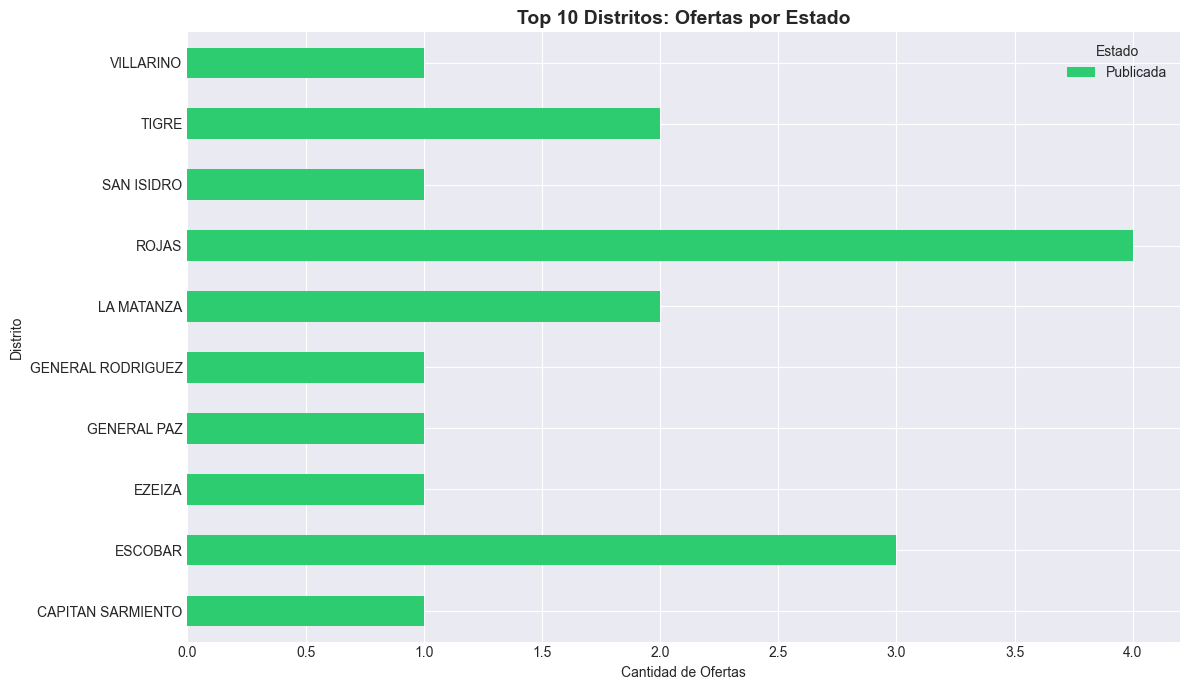

In [16]:
# Top 10 distritos por estado
top_10_distritos = df['descdistrito'].value_counts().head(10).index
df_top10 = df[df['descdistrito'].isin(top_10_distritos)]

# Tabla cruzada
crosstab = pd.crosstab(df_top10['descdistrito'], df_top10['estado'], margins=True)
print(crosstab)

# Gráfico
crosstab_plot = pd.crosstab(df_top10['descdistrito'], df_top10['estado'])
crosstab_plot.plot(kind='barh', stacked=True, figsize=(12, 7), color=['#2ecc71', '#e74c3c'])
plt.title('Top 10 Distritos: Ofertas por Estado', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Ofertas')
plt.ylabel('Distrito')
plt.legend(title='Estado')
plt.tight_layout()
plt.show()

## 10. Filtros y Consultas Útiles

In [17]:
# Filtrar solo ofertas publicadas
df_publicadas = df[df['estado'] == 'Publicada']
print(f"Ofertas Publicadas: {len(df_publicadas):,}")
print("\nTop 10 distritos con ofertas publicadas:")
print(df_publicadas['descdistrito'].value_counts().head(10))

Ofertas Publicadas: 21

Top 10 distritos con ofertas publicadas:
descdistrito
ROJAS                4
ESCOBAR              3
TIGRE                2
LA MATANZA           2
CAPITAN SARMIENTO    1
GENERAL PAZ          1
EZEIZA               1
SAN ISIDRO           1
VILLARINO            1
GENERAL RODRIGUEZ    1
Name: count, dtype: int64


In [18]:
# Buscar ofertas de Inglés
df_ingles = df[df['cargo'].str.contains('INGLES', na=False, case=False)]
print(f"Ofertas de Inglés: {len(df_ingles)}")
print("\nDistritos con más ofertas de Inglés:")
print(df_ingles['descdistrito'].value_counts().head(10))

Ofertas de Inglés: 0

Distritos con más ofertas de Inglés:
Series([], Name: count, dtype: int64)


In [19]:
# Ofertas de Nivel Primario
df_primaria = df[df['descnivelmodalidad'] == 'PRIMARIA']
print(f"Ofertas de Primaria: {len(df_primaria)}")
print("\nCargos más demandados en Primaria:")
print(df_primaria['cargo'].value_counts().head(10))

Ofertas de Primaria: 0

Cargos más demandados en Primaria:
Series([], Name: count, dtype: int64)


In [20]:
# Ofertas en un distrito específico (ejemplo: TIGRE)
distrito = 'TIGRE'
df_distrito = df[df['descdistrito'] == distrito]
print(f"Ofertas en {distrito}: {len(df_distrito)}")
print("\nPor estado:")
print(df_distrito['estado'].value_counts())
print("\nTop cargos:")
print(df_distrito['cargo'].value_counts().head(10))

Ofertas en TIGRE: 2

Por estado:
estado
Publicada    2
Name: count, dtype: int64

Top cargos:
cargo
CONSTRUCCION DE CIUDADANIA (CCD)    2
Name: count, dtype: int64


## 11. Exportar Resultados

In [21]:
# Exportar a CSV
df.to_csv('ofertas_procesadas.csv', index=False, encoding='utf-8-sig')
print("✓ Exportado: ofertas_procesadas.csv")

# Exportar solo ofertas publicadas
df_publicadas.to_csv('ofertas_publicadas.csv', index=False, encoding='utf-8-sig')
print("✓ Exportado: ofertas_publicadas.csv")

# Resumen por distrito
resumen_distrito = df.groupby('descdistrito').agg({
    'ige': 'count',
    'estado': lambda x: (x == 'Publicada').sum(),
    'hsmodulos': 'mean'
}).rename(columns={
    'ige': 'total_ofertas',
    'estado': 'ofertas_publicadas',
    'hsmodulos': 'promedio_horas'
}).sort_values('total_ofertas', ascending=False)

resumen_distrito.to_csv('resumen_por_distrito.csv', encoding='utf-8-sig')
print("✓ Exportado: resumen_por_distrito.csv")

print("\nArchivos generados exitosamente")

✓ Exportado: ofertas_procesadas.csv
✓ Exportado: ofertas_publicadas.csv
✓ Exportado: resumen_por_distrito.csv

Archivos generados exitosamente


## 12. Consulta Personalizada

In [ ]:
# Crea tus propias consultas aquí
# Ejemplo: Ofertas publicadas de nivel secundario en La Matanza

resultado = df[
    (df['estado'] == 'Publicada') &
    (df['descnivelmodalidad'] == 'SECUNDARIA') &
    (df['descdistrito'] == 'QUILMES')
]

print(f"Resultados encontrados: {len(resultado)}")
if len(resultado) > 0:
    print("\nPrimeros 5 resultados:")
    display(resultado[['cargo', 'escuela', 'turno', 'hsmodulos']].head())

Resultados encontrados: 0
